Importing the libraries and dataset. Also taking a look at the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

slidings = pd.read_csv('Data\slidings_training.csv')
slidings = slidings.drop(columns='Unnamed: 0',axis=1)
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
0,1,1,0,0,0,0,0,0,1,0.60
1,1,1,0,0,0,0,0,0,1,0.60
2,1,1,0,0,0,0,0,0,1,0.13
3,1,1,0,0,0,0,0,0,1,2.17
4,1,1,0,0,0,0,0,0,1,93.60


In [2]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45931 entries, 0 to 45930
Data columns (total 10 columns):
situation         45931 non-null int64
location          45931 non-null int64
risk              45931 non-null int64
victims           45931 non-null int64
deadly_victims    45931 non-null int64
length            45931 non-null int64
num_points        45931 non-null int64
in_place          45931 non-null int64
sliding           45931 non-null int64
Rain              45931 non-null float64
dtypes: float64(1), int64(9)
memory usage: 3.5 MB


Performing a t-SNE analysis on the dataset without the situation feature.

In [4]:
slidings['risk'].value_counts()

0    37999
3     4715
2     1878
4     1017
1      322
Name: risk, dtype: int64

In [5]:
slidings.sliding.value_counts()

0    30774
1    15157
Name: sliding, dtype: int64

In [7]:
X = slidings.drop(columns={'sliding','situation'},axis=1)
random_state = 2
X

,location,risk,victims,deadly_victims,length,num_points,in_place,Rain
0,1,0,0,0,0,0,0,0.60
1,1,0,0,0,0,0,0,0.60
2,1,0,0,0,0,0,0,0.13
3,1,0,0,0,0,0,0,2.17
4,1,0,0,0,0,0,0,93.60
...,...,...,...,...,...,...,...,...
45926,119,0,0,0,0,0,0,0.00
45927,119,0,0,0,0,0,0,0.00
45928,119,0,0,0,0,0,0,8.60
45929,119,0,0,0,0,0,0,1.80


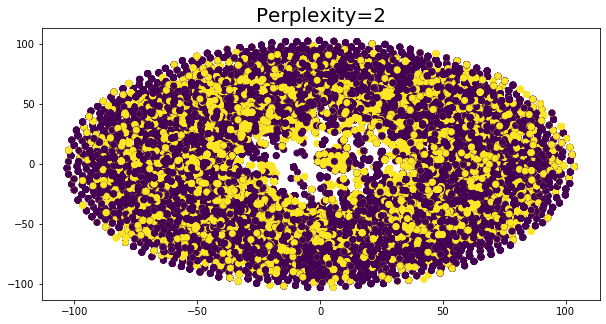

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
perplexity = 2
model = TSNE(n_components=2,perplexity=perplexity,random_state=random_state)
X_TSNE = model.fit_transform(X)
plt.figure(figsize=(10, 5))
plt.title('Perplexity='+str(perplexity),fontsize=20)
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=slidings.sliding)


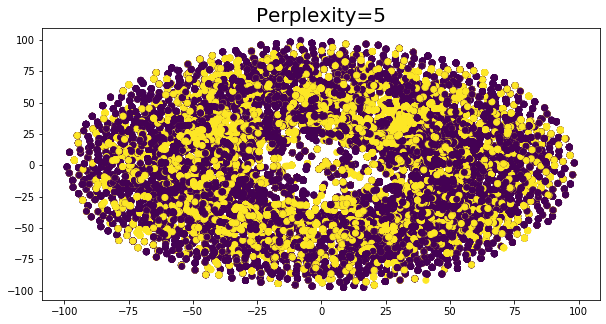

In [9]:
perplexity = 5
model = TSNE(n_components=2,perplexity=perplexity,random_state=random_state)
X_TSNE = model.fit_transform(X)
plt.figure(figsize=(10, 5))
plt.title('Perplexity='+str(perplexity),fontsize=20)
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=slidings.sliding)

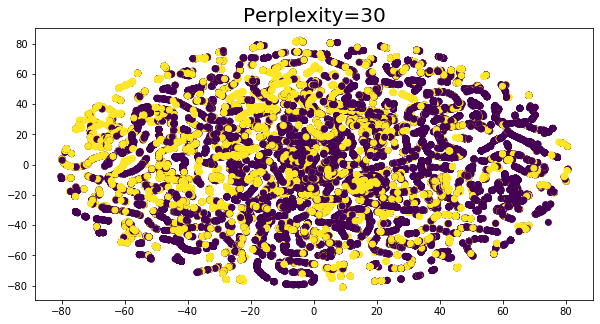

In [10]:
perplexity = 30
model = TSNE(n_components=2,perplexity=perplexity,random_state=random_state)
X_TSNE = model.fit_transform(X)
plt.figure(figsize=(10, 5))
plt.title('Perplexity='+str(perplexity),fontsize=20)
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=slidings.sliding)

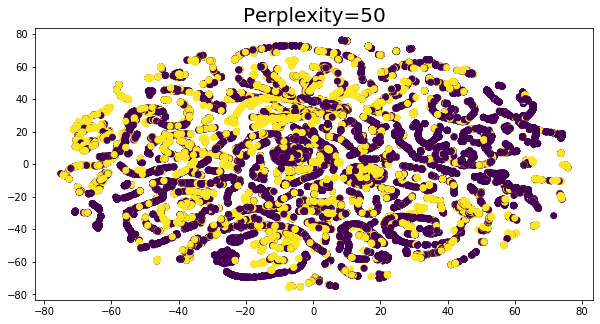

In [11]:
perplexity = 50
model = TSNE(n_components=2,perplexity=perplexity,random_state=random_state)
X_TSNE = model.fit_transform(X)
plt.figure(figsize=(10, 5))
plt.title('Perplexity='+str(perplexity),fontsize=20)
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=slidings.sliding)

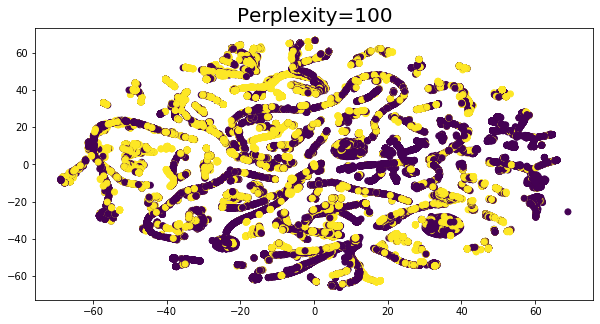

In [12]:
perplexity = 100
model = TSNE(n_components=2,perplexity=perplexity,random_state=random_state)
X_TSNE = model.fit_transform(X)
plt.figure(figsize=(10, 5))
plt.title('Perplexity='+str(perplexity),fontsize=20)
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=slidings.sliding)

<Figure size 864x432 with 0 Axes>

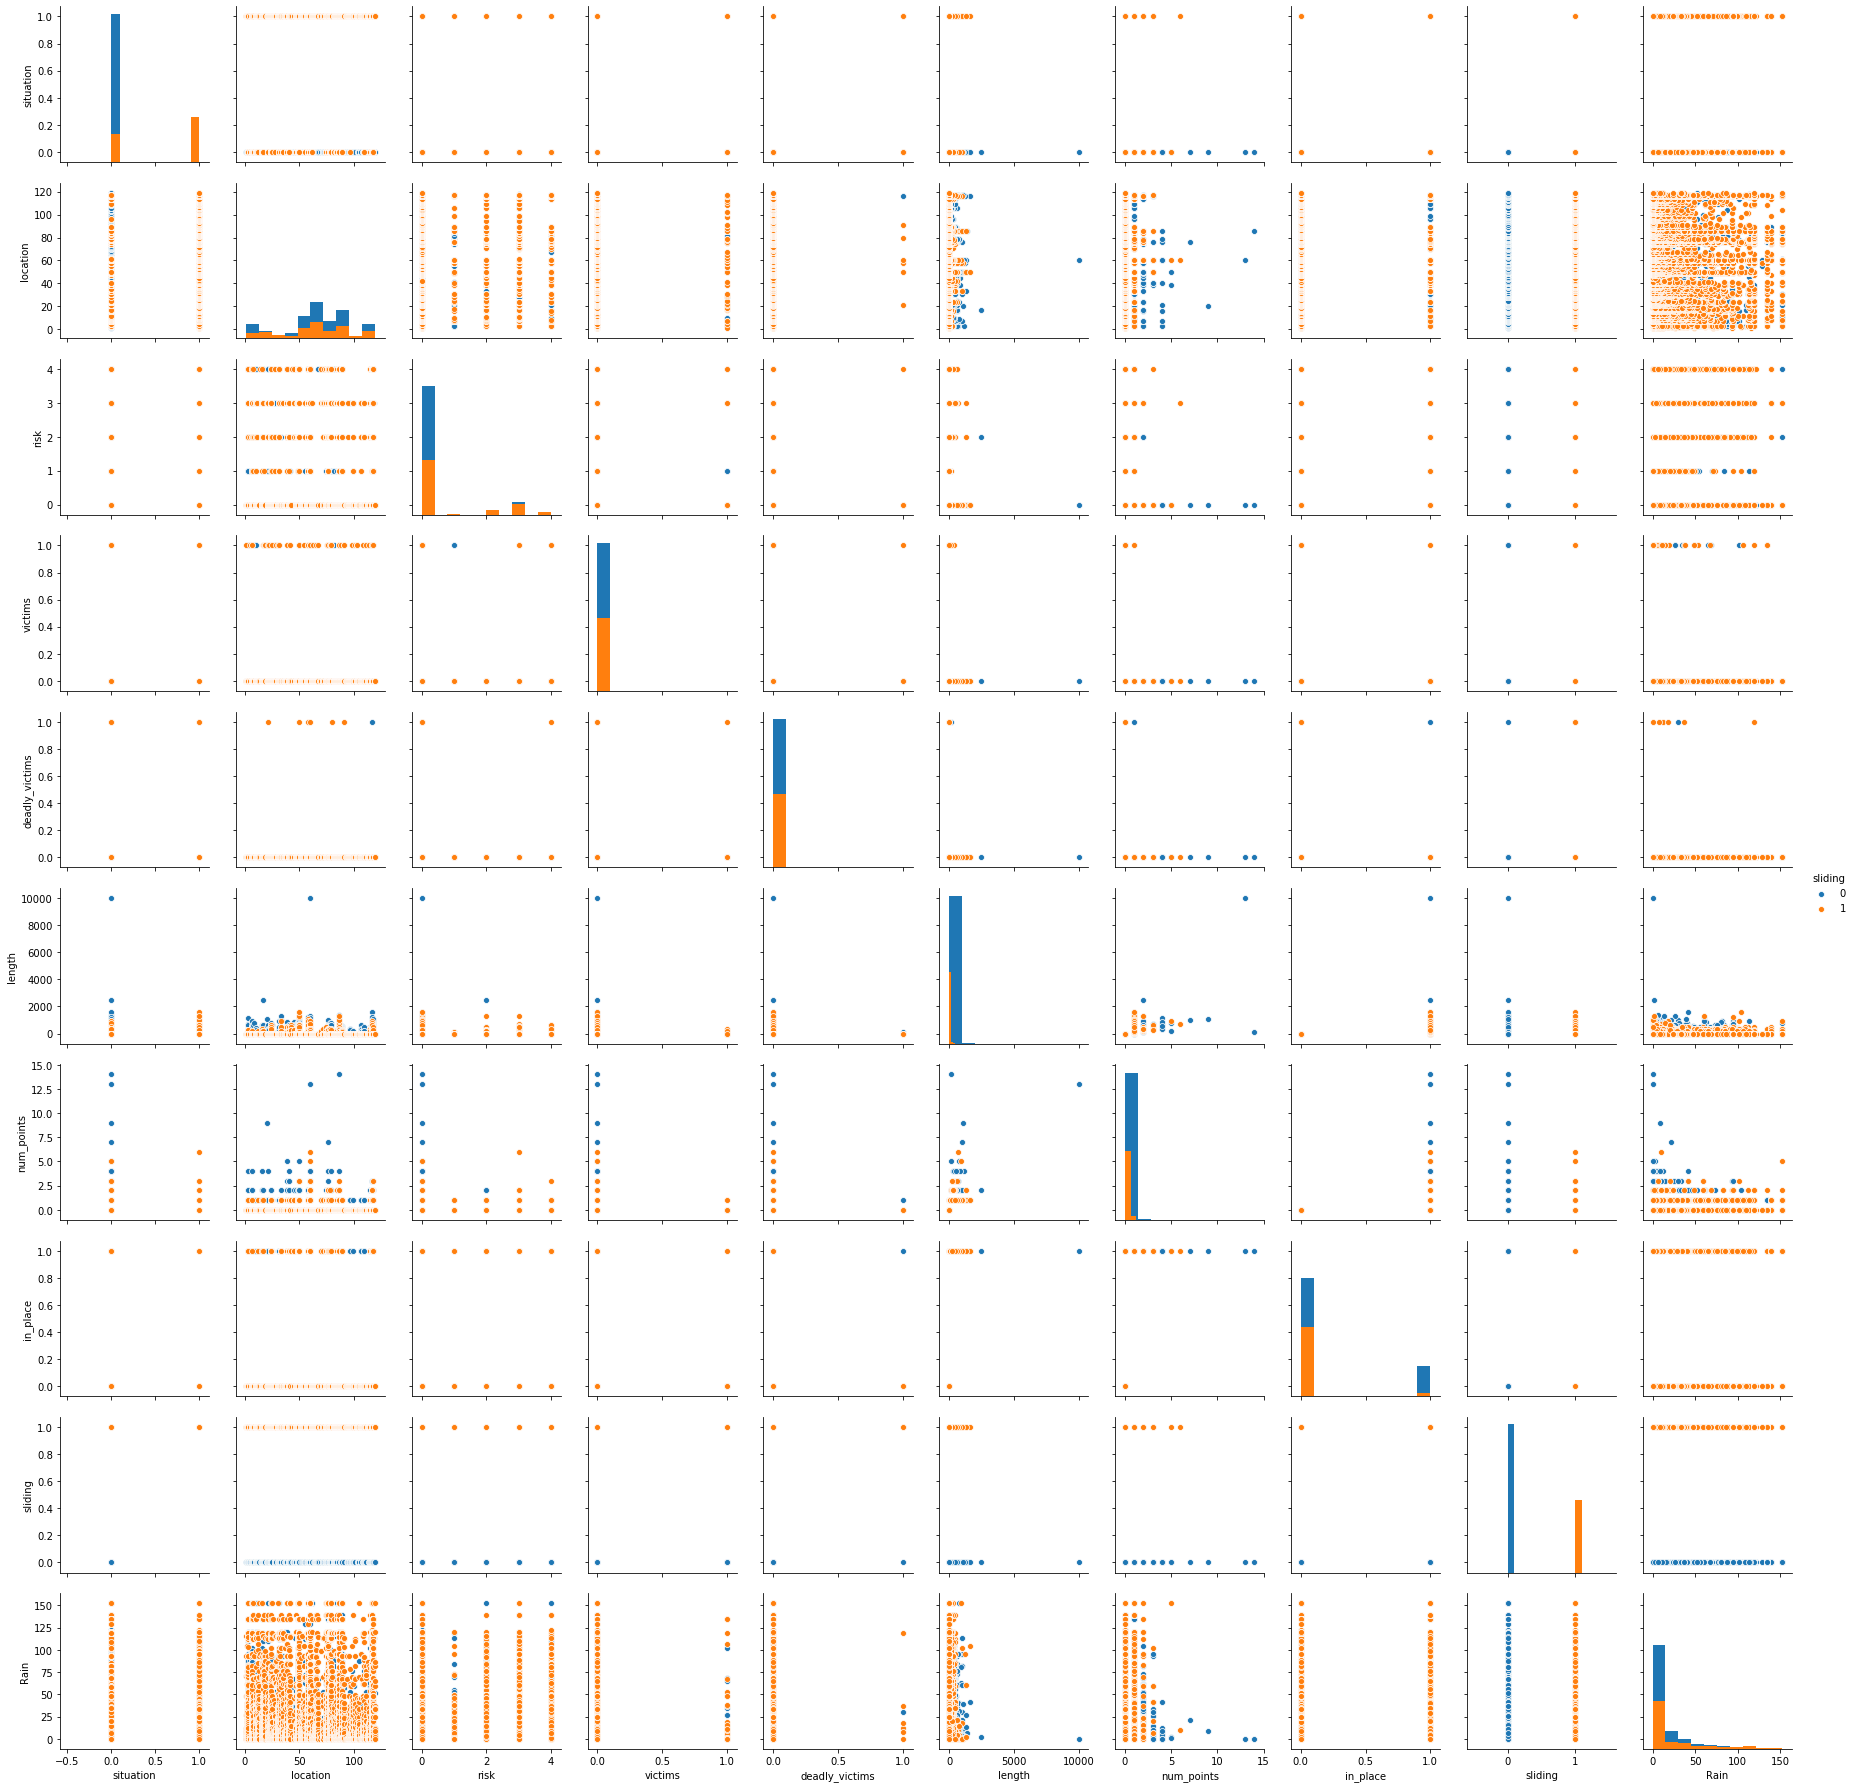

In [13]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.pairplot(slidings, hue='sliding', diag_kind='hist')

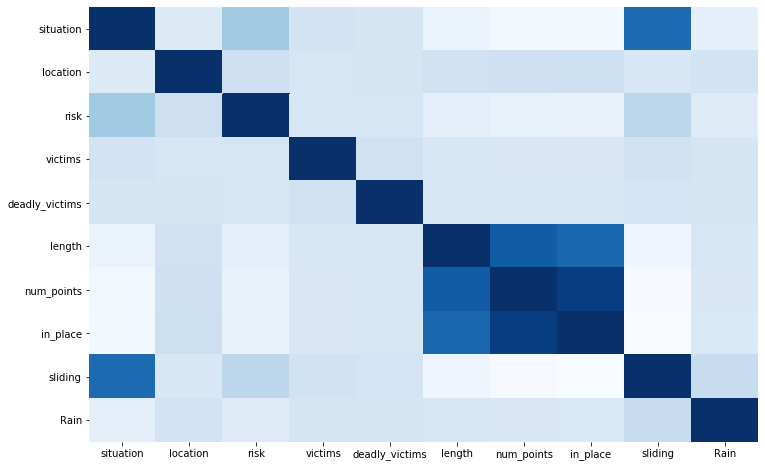

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(slidings.corr(),cbar=False,annot=False,cmap='Blues')

After these three tests we can only conclude what we have been seeing before:
Which is if we disregard the situation feature the model becomes too random.
So now the next step would be asking the local government two questions about the original data:
1- What is the situation feature?
If this feature represents that the government has considered that everything could be done at the locale and the case is closed, then it can be reasonable to consider a feature with such a weight, however if it is only the closing of a bureaucratic  process then it is unrealistic to have such a weight.
On side note we ran a few tests, like reducing the dataset to only 0 or 1 situation rows and all points to this feature being a bureaucratic  feature, mainly because all 1 situation rows have 1 slidings values (we'll show this below).
2- How is the date collected?
We assumed that the date that was on the ID was the date that the sliding took place, yet we have no proof of this, meaning that we can be crossing the data with unrelated rain values. 
Furthermore we could reduce the location feature to clusters of locations, like north, south and east zones, but after this type of data dispersion it doesn't seem to solve our problem.

In [7]:
import pandas as pd
sliding = pd.read_csv('Data\slidings_training.csv')
sliding = sliding.drop(columns='Unnamed: 0',axis=1)
sliding = sliding[sliding.situation!=0]
sliding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 45930
Data columns (total 10 columns):
situation         9357 non-null int64
location          9357 non-null int64
risk              9357 non-null int64
victims           9357 non-null int64
deadly_victims    9357 non-null int64
length            9357 non-null int64
num_points        9357 non-null int64
in_place          9357 non-null int64
sliding           9357 non-null int64
Rain              9357 non-null float64
dtypes: float64(1), int64(9)
memory usage: 804.1 KB


In [8]:
sliding.sliding.value_counts()

1    9357
Name: sliding, dtype: int64